In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
dog = cv2.imread("CATS_DOGS/train/DOG/5.jpg")

In [51]:
### PREPROCESSING

In [52]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest") #ADD TARGET_SIZE 

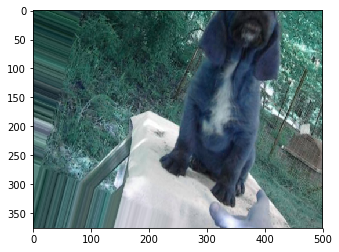

In [54]:
plt.imshow(image_gen.random_transform(dog))

In [55]:
image_gen.flow_from_directory("CATS_DOGS/train/")

Found 18743 images belonging to 2 classes.


In [56]:
### BUILD MODEL

In [57]:
from keras.models import Sequential

In [58]:
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPooling2D,Conv2D

In [59]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu",))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu",))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu",))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dropout(rate=0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [63]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [64]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [65]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/1


In [ ]:
results.history["acc"]